In [6]:
#%%
import json
import pandas as pd
import numpy as np
import os
from sklearn.metrics import roc_auc_score
# Opening JSON file
im_df = pd.read_json('all_norm_Importance.json')
im_df=im_df.round(decimals=1,out=None)
im_df
shap_df=im_df.ort_values(['shap'], ascending=False)
shap_df

AttributeError: 'DataFrame' object has no attribute 'sort'

In [2]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [3]:
train_data= pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\train_data.csv")

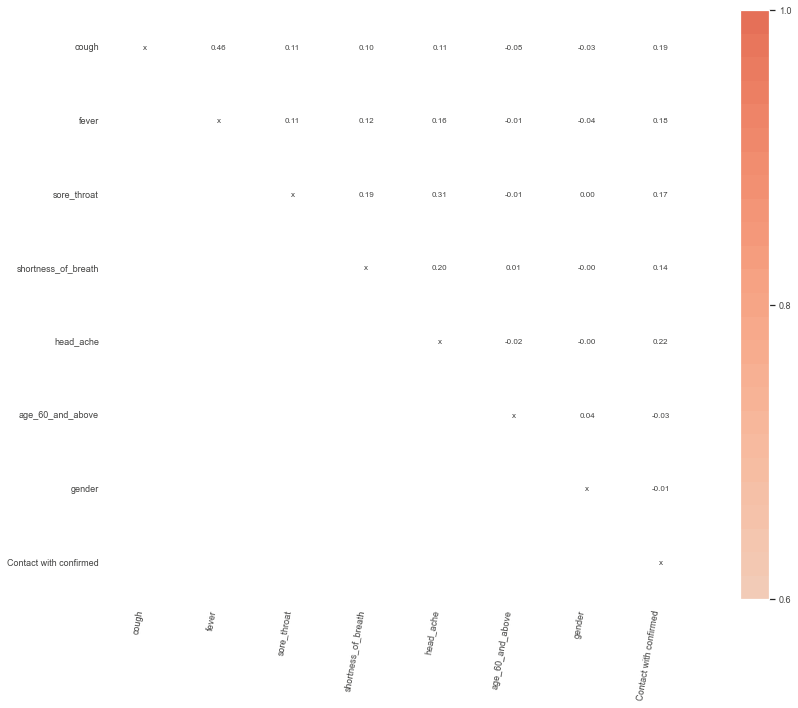

In [4]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(train_data, figsize=(15,10))
viz.view()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from collections import Counter
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

In [50]:
trian_data=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\train_data.csv");
test_data=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\test_data.csv");
trian_labels=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\train_labels.csv");
test_labels=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\test_labels.csv");

col_names=trian_data.columns;
    # loop to change each column to float type
for col in col_names:
    trian_data[col] = trian_data[col].astype('float',copy=False);
    test_data[col]= test_data[col].astype('float',copy=False);
    #selecting raws with no nan values
new_train=trian_data
new_train["Result"]=trian_labels
new_test=test_data
new_test["Result"]=test_labels
trian_data_nonull=new_train.dropna()
test_data_nonull=new_test.dropna()
trian_label_nonull=trian_data_nonull["Result"]
test_label_nonull=test_data_nonull["Result"]
trian_data_nonull.drop(labels = ["Result",], axis=1,inplace=True )
test_data_nonull.drop(labels = ["Result",], axis=1,inplace=True )
for col in col_names:
    trian_data_nonull[col] = trian_data_nonull[col].astype('float',copy=False);
    test_data_nonull[col]= test_data_nonull[col].astype('float',copy=False);
trian_data_nonull.reset_index(drop=True, inplace=True)
test_data_nonull.reset_index(drop=True, inplace=True)
    #Scaling using the Standard Scaler
sc_1=StandardScaler();
X_1=pd.DataFrame(sc_1.fit_transform(trian_data_nonull));
X_train, X_val, y_train, y_val = train_test_split(X_1, trian_label_nonull, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0
test_scale_data=pd.DataFrame(sc_1.fit_transform(test_data_nonull))

c:\Users\shade\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shade\AppData\Local\Temp\ipykernel_24756\2599680352.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trian_data_nonull[col] = trian_data_nonull[col].astype('float',copy=False);
C:\Users\shade\AppData\Local\Temp\ipykernel_24756\2599680352.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [51]:
#Bulding them Model
lgbm_clf = lgb.LGBMClassifier(
    num_leaves= 20,
    min_data_in_leaf= 4,
    feature_fraction= 0.2,
    bagging_fraction=0.8,
    bagging_freq=5,
    learning_rate= 0.05,
    verbose=1,
    num_boost_round=603,
    metric="auc",
    objective = 'binary',)

    #Fitting the Model
lgbm_clf.fit(
    X_train,
    y_train,
    eval_set = [(X_val, y_val)],
    eval_metric="auc",
    )
preds = lgbm_clf.predict_proba(test_scale_data,num_iteration=100)
predict_model=lgbm_clf;

c:\Users\shade\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=603, num_boost_round=603 will be ignored. Current value: num_iterations=603
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsamp

In [52]:
print(f"""LGBM Training Score: {predict_model.score(X_train, y_train):.2f}
lgbm Validation Score: {predict_model.score(X_val, y_val):.2f}""")

LGBM Training Score: 0.95
lgbm Validation Score: 0.95


In [53]:
col_names

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'Contact with confirmed'],
      dtype='object')

In [54]:
X_train.columns=col_names

In [55]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(predict_model, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)
perm_imp_rfpimp

c:\Users\shade\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=603, num_boost_round=603 will be ignored. Current value: num_iterations=603
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current

,Feature,Importance
0,Contact with confirmed,0.197468
1,sore_throat,0.177435
2,shortness_of_breath,0.131646
3,head_ache,0.111613
4,fever,0.060099
5,gender,0.017171
6,age_60_and_above,0.014309
7,cough,-0.045790


In [56]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [57]:

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

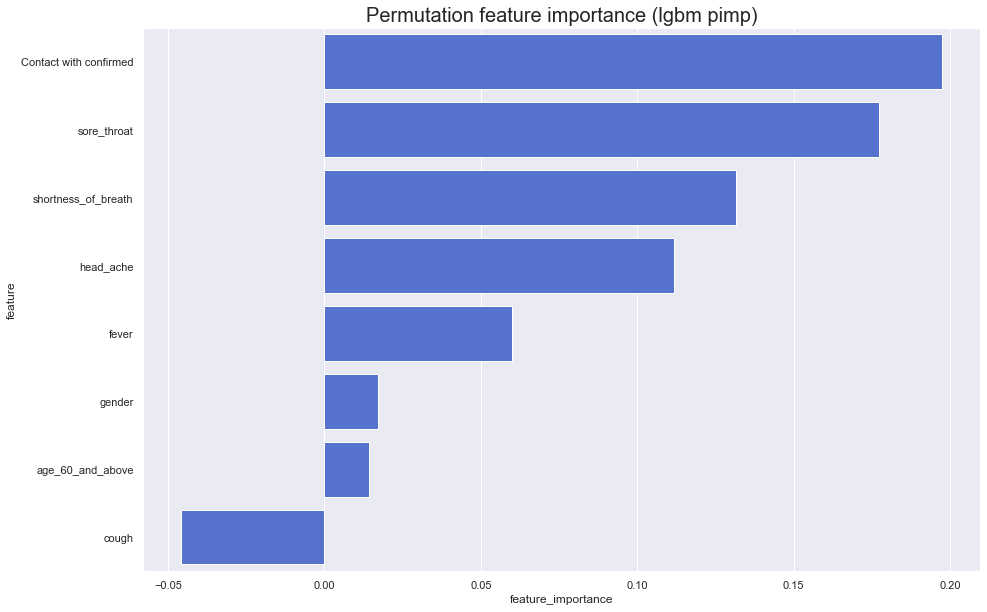

In [58]:
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (lgbm pimp)')

###BLOOD DATA

In [59]:
trian_data=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\train_blood.csv");
test_data=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\test_blood.csv");
trian_labels=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\y_train_blood.csv");
test_labels=pd.read_csv(r"C:\Users\shade\Desktop\עבודות\שנה ד״\פרויקט\VS_project\4th-year-project\Data\y_test_blood.csv");

col_names=trian_data.columns;
    # loop to change each column to float type
for col in col_names:
    trian_data[col] = trian_data[col].astype('float',copy=False);
    test_data[col]= test_data[col].astype('float',copy=False);
    #selecting raws with no nan values
new_train=trian_data
new_train["Result"]=trian_labels
new_test=test_data
new_test["Result"]=test_labels
trian_data_nonull=new_train.dropna()
test_data_nonull=new_test.dropna()
trian_label_nonull=trian_data_nonull["Result"]
test_label_nonull=test_data_nonull["Result"]
trian_data_nonull.drop(labels = ["Result",], axis=1,inplace=True )
test_data_nonull.drop(labels = ["Result",], axis=1,inplace=True )
for col in col_names:
    trian_data_nonull[col] = trian_data_nonull[col].astype('float',copy=False);
    test_data_nonull[col]= test_data_nonull[col].astype('float',copy=False);
trian_data_nonull.reset_index(drop=True, inplace=True)
test_data_nonull.reset_index(drop=True, inplace=True)
    #Scaling using the Standard Scaler
sc_1=StandardScaler();
X_1=pd.DataFrame(sc_1.fit_transform(trian_data_nonull));
X_train, X_val, y_train, y_val = train_test_split(X_1, trian_label_nonull, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0
test_scale_data=pd.DataFrame(sc_1.fit_transform(test_data_nonull))

c:\Users\shade\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shade\AppData\Local\Temp\ipykernel_24756\3827913656.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trian_data_nonull[col] = trian_data_nonull[col].astype('float',copy=False);
C:\Users\shade\AppData\Local\Temp\ipykernel_24756\3827913656.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [60]:
trian_data

,age,Mono_,Male,ALT,AST,Albumin,Alkaline,Bilirubin_direct,Bilirubin_indirect,Creatinine,...,Hemoglobin,MCH,MCV,Mean_platelet_volume,Neutrophils__,Platelet__automated_count,RBC,RDW,WBC,Result
0,70.0,2.9,1.0,11.0,NaN,NaN,NaN,1.00,0.50,3.76,...,8.5,30.5,90.1,9.7,92.2,245.0,2.8,19.0,19.1,1
1,42.0,2.7,0.0,19.0,40.0,26.0,22.0,0.40,0.30,1.39,...,9.8,29.8,91.8,11.7,92.0,91.0,3.3,13.4,12.1,0
2,57.0,5.6,0.0,10.0,11.0,24.0,63.0,NaN,NaN,3.10,...,5.7,29.7,89.4,8.4,90.3,112.0,1.9,17.1,7.5,1
3,74.0,1.1,1.0,8.0,NaN,30.0,65.0,NaN,NaN,1.40,...,10.8,31.1,92.7,10.0,87.6,171.0,3.5,17.7,8.6,1
4,77.0,1.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.93,...,12.7,29.4,87.0,10.4,91.7,188.0,4.3,14.7,11.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6031,72.0,8.8,1.0,15.0,34.0,18.0,442.0,0.17,0.11,2.32,...,8.1,28.2,83.0,10.2,78.7,31.0,2.9,18.4,4.4,1
6032,62.0,69.7,1.0,14.0,13.0,27.0,67.0,5.28,1.02,1.13,...,6.2,30.4,82.4,8.5,10.5,19.0,2.0,13.8,0.0,0
6033,83.0,4.1,1.0,57.0,78.0,22.0,146.0,0.26,0.13,3.39,...,9.6,33.9,98.5,8.7,91.0,251.0,2.8,17.8,26.5,1
6034,35.0,2.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.91,...,11.6,28.5,88.5,11.1,84.1,98.0,4.1,14.9,16.2,1


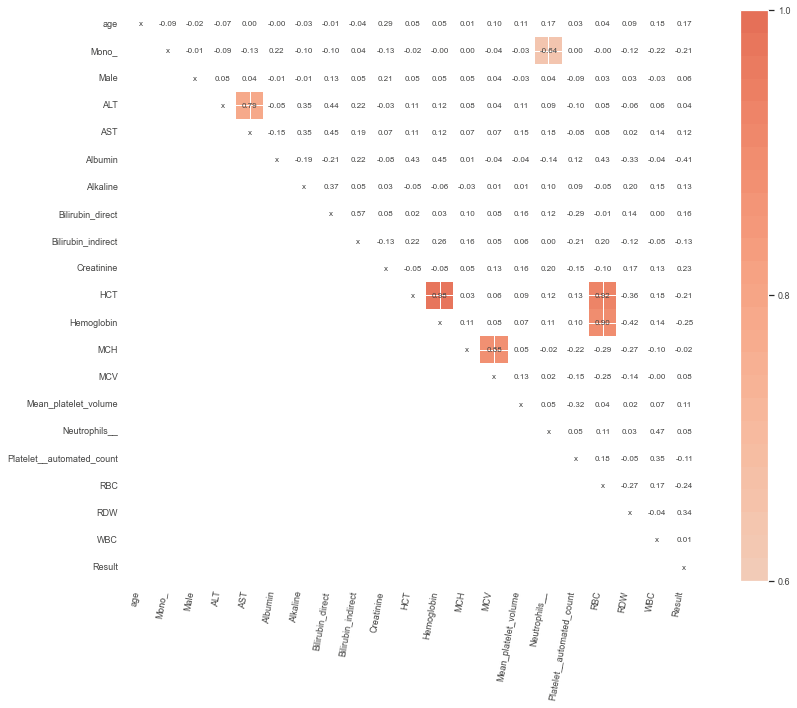

In [61]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(trian_data, figsize=(15,10))
viz.view()

In [62]:
#Bulding them Model Blood
lgbm_clf = lgb.LGBMClassifier(
    max_depth=8,
    num_leaves=2*8,
    subsample=0.8,
    random_state=0,
    learning_rate=0.01,
    )

#Fitting the Model
lgbm_clf.fit(
    X_train,
    y_train,
    eval_set = [(X_val, y_val)],
    eval_metric="auc",
    )
preds = lgbm_clf.predict_proba(test_scale_data,num_iteration=100000)
predict_model=lgbm_clf;

[1]	valid_0's auc: 0.754754	valid_0's binary_logloss: 0.660205
[2]	valid_0's auc: 0.753998	valid_0's binary_logloss: 0.6578
[3]	valid_0's auc: 0.755995	valid_0's binary_logloss: 0.65541
[4]	valid_0's auc: 0.755953	valid_0's binary_logloss: 0.653121
[5]	valid_0's auc: 0.756667	valid_0's binary_logloss: 0.650848
[6]	valid_0's auc: 0.756954	valid_0's binary_logloss: 0.648682
[7]	valid_0's auc: 0.757282	valid_0's binary_logloss: 0.646497
[8]	valid_0's auc: 0.759378	valid_0's binary_logloss: 0.644356
[9]	valid_0's auc: 0.759466	valid_0's binary_logloss: 0.642236
[10]	valid_0's auc: 0.759868	valid_0's binary_logloss: 0.640197
[11]	valid_0's auc: 0.76189	valid_0's binary_logloss: 0.638186
[12]	valid_0's auc: 0.762026	valid_0's binary_logloss: 0.636234
[13]	valid_0's auc: 0.761807	valid_0's binary_logloss: 0.634328
[14]	valid_0's auc: 0.762214	valid_0's binary_logloss: 0.632389
[15]	valid_0's auc: 0.762797	valid_0's binary_logloss: 0.630592
[16]	valid_0's auc: 0.763298	valid_0's binary_logloss

In [63]:
print(f"""LGBM Training Score: {predict_model.score(X_train, y_train):.2f}
lgbm Validation Score: {predict_model.score(X_val, y_val):.2f}""")

LGBM Training Score: 0.80
lgbm Validation Score: 0.75


In [64]:
X_train.columns=col_names

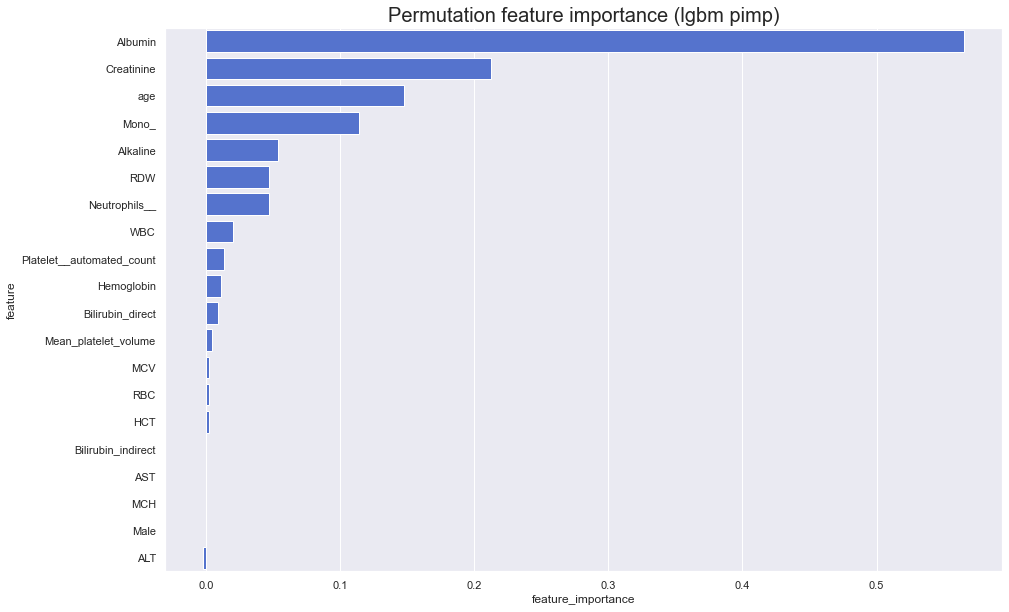

In [65]:
perm_imp_rfpimp = permutation_importances(predict_model, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (lgbm pimp)')

In [71]:
im_df = pd.read_json('all_norm_Importance.json')
im_df=im_df.round(decimals=1,out=None)
im_df.sort_values(by=['shap'],ascending=False,inplace=True)
im_df

,shap,lime,lgbm,dice_global
Albumin,1.0,0.0,0.8,0.0
Creatinine,0.5,1.0,1.0,1.0
age,0.2,0.3,0.7,0.0
RDW,0.2,0.7,0.5,0.1
Mono_,0.2,0.0,0.6,0.0
Alkaline,0.1,0.3,0.3,0.1
Neutrophils__,0.1,0.0,0.3,1.0
Hemoglobin,0.1,0.0,0.4,1.0
MCV,0.0,0.1,0.2,1.0
RBC,0.0,0.1,0.1,0.1
